In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
peng = sns.load_dataset('penguins')

In [7]:
flig = sns.load_dataset('flights')

In [8]:
peng.shape

(344, 7)

In [9]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
peng.groupby('island')['species'].count()

island
Biscoe       168
Dream        124
Torgersen     52
Name: species, dtype: int64

In [11]:
peng['island'].value_counts(ascending=True)

Torgersen     52
Dream        124
Biscoe       168
Name: island, dtype: int64

In [12]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot: >

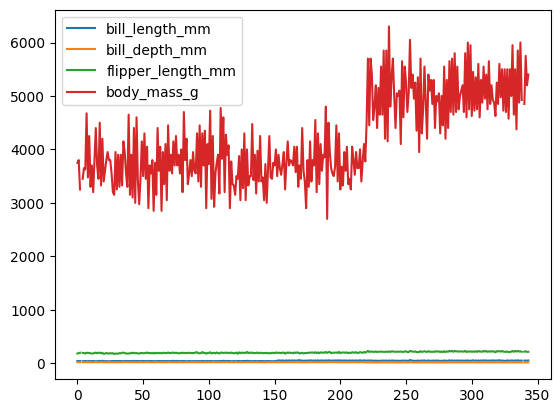

In [13]:
# Plot puro
peng.plot()

In [14]:
peng['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

<AxesSubplot: >

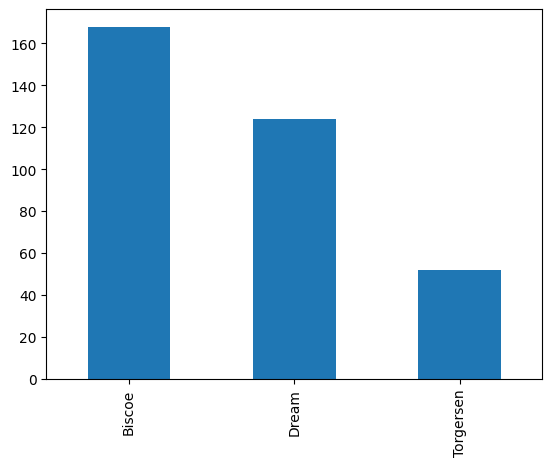

In [15]:
peng['island'].value_counts().plot.bar()

<AxesSubplot: >

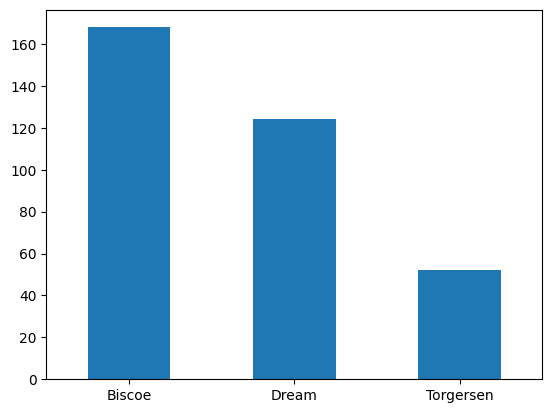

In [16]:
# plot() método de plotagem (funciona com pandas.Series ou com pandas.DataFrame)
# kind = tipo de gráfico
# rot = rotaciona a legenda do eixo x
peng.island.value_counts().plot(kind='bar', rot=0)

<AxesSubplot: >

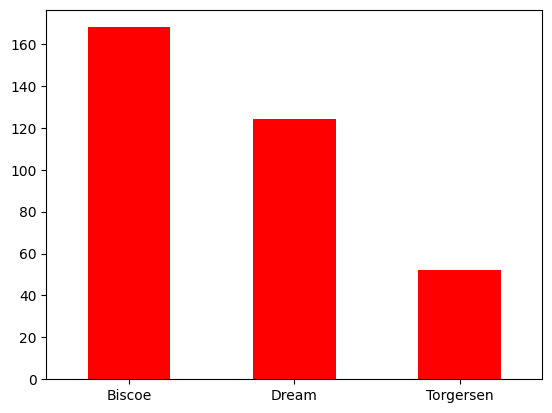

In [17]:
peng.island.value_counts().plot(kind='bar', rot=0, color='red')

In [18]:
# agrupando os dados por ilha e sexo
peng.groupby(['island', 'sex'])['species'].count()

island     sex   
Biscoe     Female    80
           Male      83
Dream      Female    61
           Male      62
Torgersen  Female    24
           Male      23
Name: species, dtype: int64

<AxesSubplot: xlabel='island,sex'>

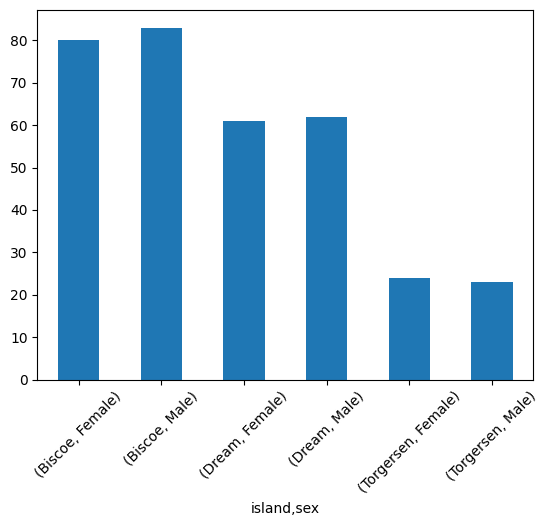

In [19]:
# listando agrupamento em gráfico de barras
peng.groupby(['island', 'sex'])['species'].count().plot(kind="bar", rot=45)

In [20]:
peng_count_isl_sex = peng.groupby(['island', 'sex'])['species'].count()

<AxesSubplot: xlabel='island,sex'>

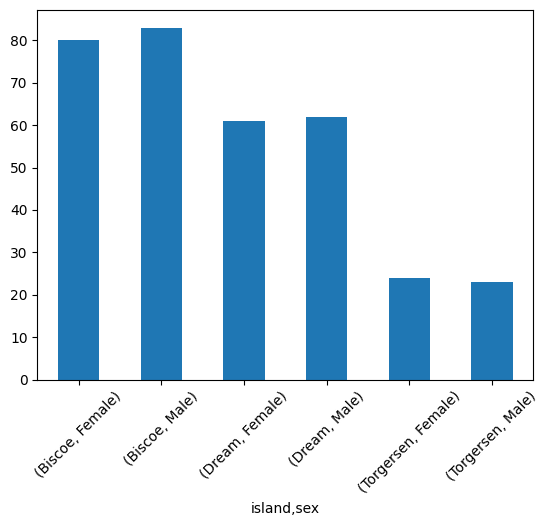

In [21]:
peng_count_isl_sex.plot(kind='bar', rot=45)

In [22]:
# ajustando a coluna de sexo para transformar as linhas em colunas
peng_dummy = pd.get_dummies(peng, columns=['sex'])

In [23]:
peng_dummy.groupby('island').sum()[['sex_Female', 'sex_Male']]

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [24]:
peng_dummy[['island', 'sex_Female', 'sex_Male']].groupby('island').sum()

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [25]:
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum()

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


<AxesSubplot: xlabel='island'>

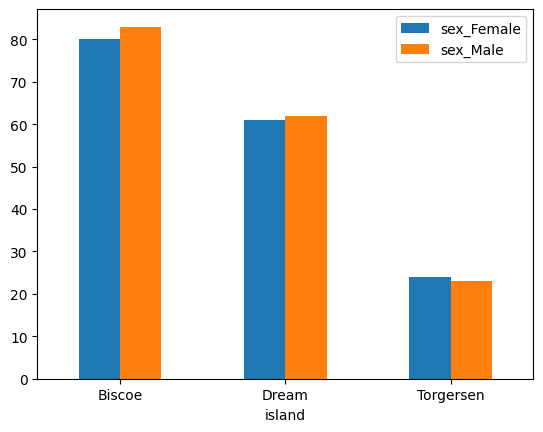

In [26]:
# listando agrupamento em gráficos de barra
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot(kind='bar', rot=0)


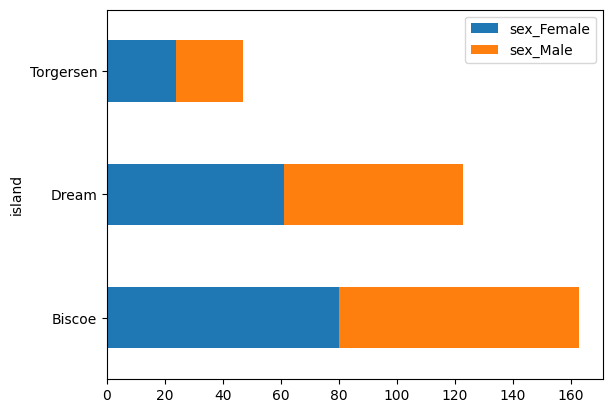

In [27]:
# listando agrupamento em gráfico de barras empilhadas
g1 = peng_dummy.groupby('island')[['sex_Female', 'sex_Male']].sum().plot(kind='barh',rot=0, stacked=True);

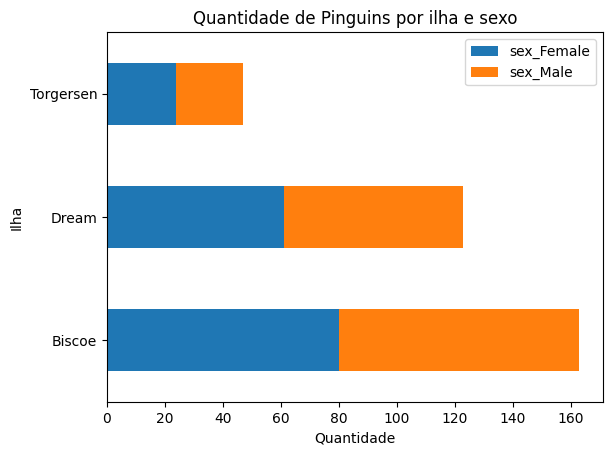

In [28]:
# Ajustando labels e legendas
g1 = \
peng_dummy.groupby('island')[['sex_Female', 'sex_Male']] \
    .sum() \
    .plot(kind='barh',rot=0, stacked=True)
g1.set_title('Quantidade de Pinguins por ilha e sexo')
g1.set_xlabel('Quantidade')
g1.set_ylabel('Ilha');

In [29]:
# revisão pivot
temperatura = pd.DataFrame([['jan','max',29],
                            ['jan','min',22],
                            ['fev','max',33],
                            ['fev','min',25],
                            ['mai','max',27],
                            ['mai','min',21]
                            ], columns=['mes', 'temp', 'val'])

In [30]:
# revisão pivot
# df.pivot(index, columns, value)
temperatura

,mes,temp,val
0,jan,max,29
1,jan,min,22
2,fev,max,33
3,fev,min,25
4,mai,max,27
5,mai,min,21


In [31]:
temperatura.pivot('mes', 'temp', 'val')

temp,max,min
mes,,
fev,33,25
jan,29,22
mai,27,21


In [32]:
temperatura.pivot('mes', 'temp', 'val').info();

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, fev to mai
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   max     3 non-null      int64
 1   min     3 non-null      int64
dtypes: int64(2)
memory usage: 72.0+ bytes


In [33]:
flig.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot: xlabel='year'>

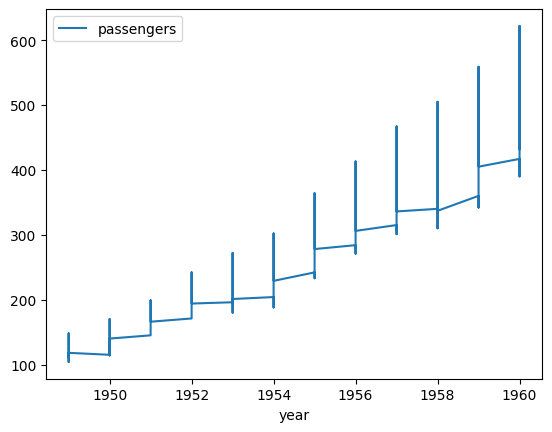

In [34]:
flig.plot(kind='line', x='year', y='passengers')

In [35]:
flig.groupby('year')['passengers'].sum()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

<AxesSubplot: xlabel='year'>

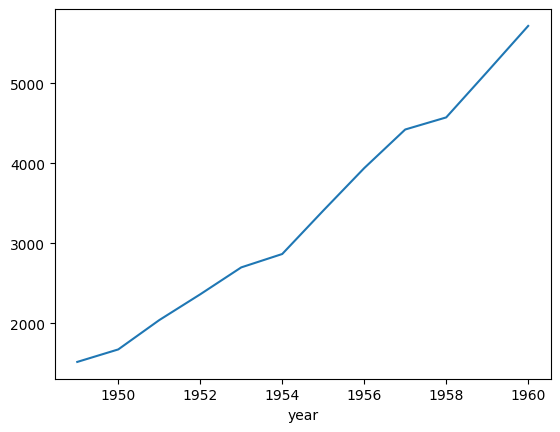

In [36]:
flig.groupby('year')['passengers'].sum().plot(kind='line')

In [37]:
flig.pivot('year','month','passengers')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot: xlabel='year'>

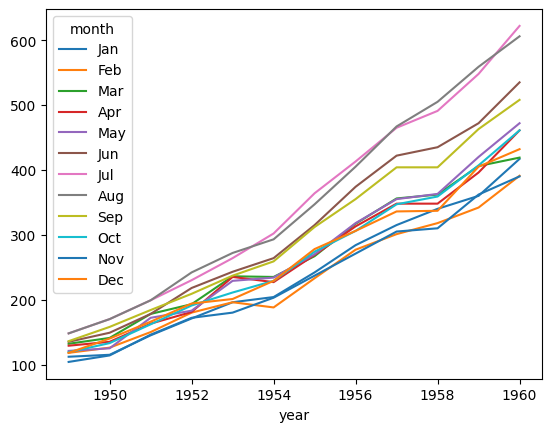

In [38]:
flig.pivot('year','month','passengers').plot(kind='line')

In [39]:
meses = ['Jan','Feb','Mar']
flig.pivot('year','month','passengers')[meses]

month,Jan,Feb,Mar
year,,,
1949,112,118,132
1950,115,126,141
1951,145,150,178
1952,171,180,193
1953,196,196,236
1954,204,188,235
1955,242,233,267
1956,284,277,317
1957,315,301,356


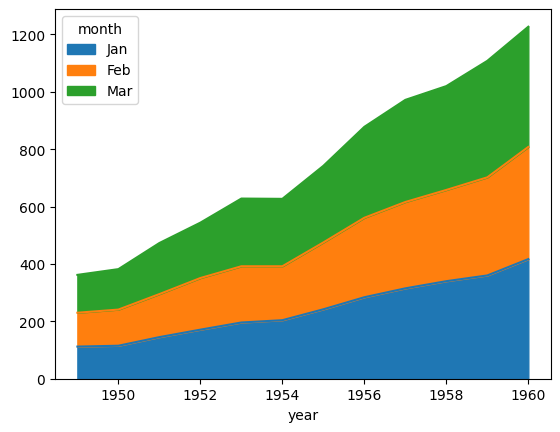

In [40]:
flig.pivot('year','month','passengers')[meses].plot(kind='area');

In [41]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


c:\Users\Elton Flavio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


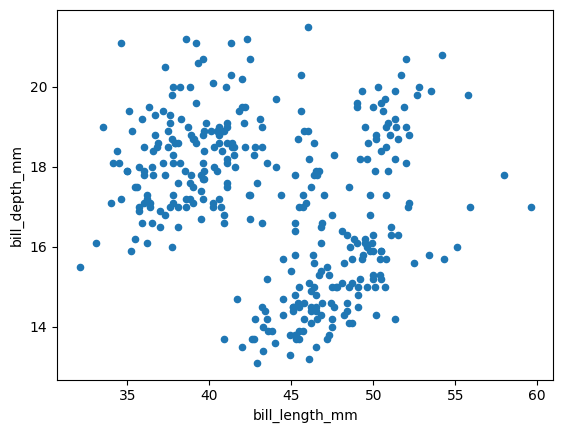

In [42]:
peng.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm');

In [43]:
peng[peng['species'] == 'Adelie'].head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


c:\Users\Elton Flavio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


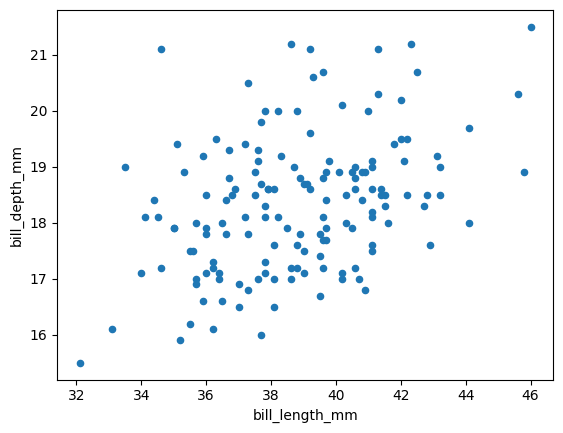

In [44]:
peng[peng['species'] == 'Adelie'].plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm');

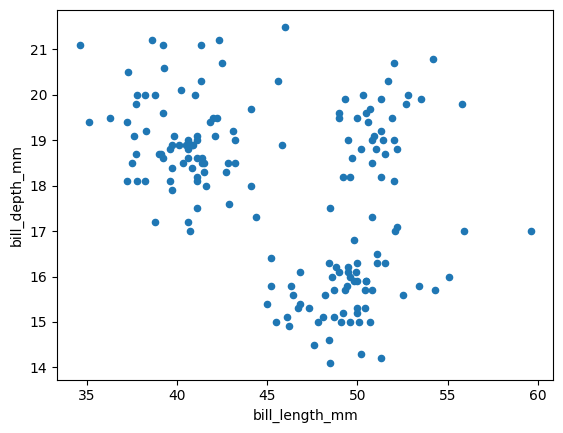

In [45]:
peng[peng['sex'] == 'Male'].plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm');


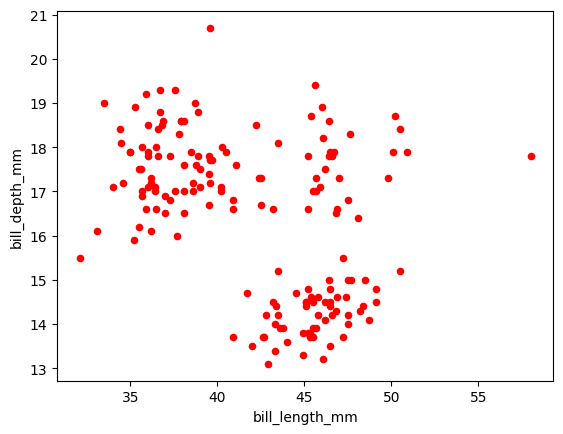

In [46]:
peng[peng['sex'] == 'Female'].plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color='red');

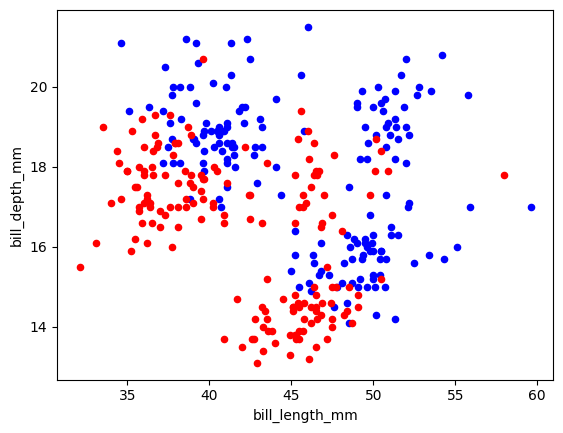

In [47]:
g1 = peng[peng['sex'] == 'Male'] \
    .plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color='blue')
g2 = peng[peng['sex'] == 'Female'] \
    .plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color='red', ax=g1)

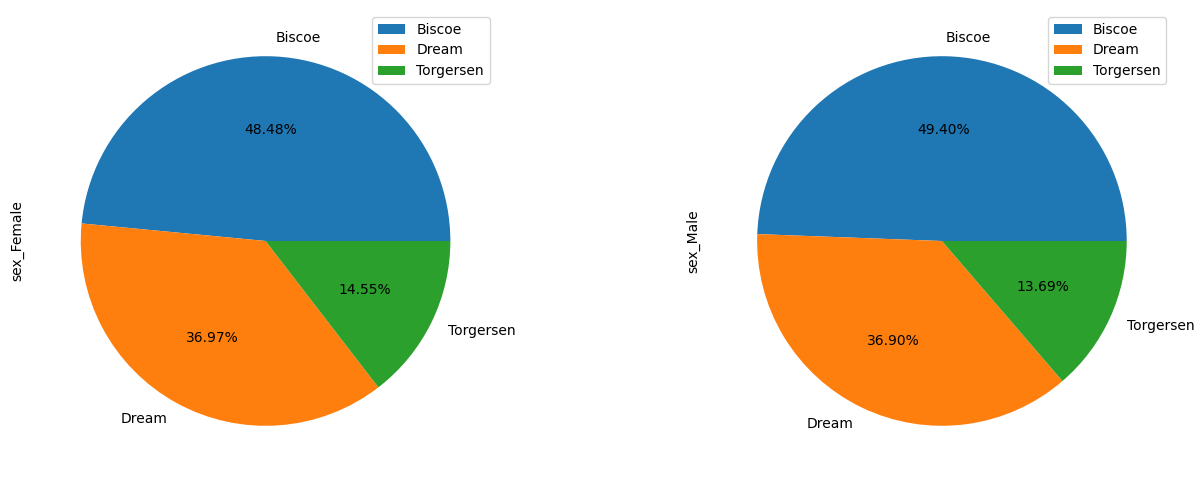

In [48]:
pd.get_dummies(peng, columns=['sex']) \
    .groupby('island')[['sex_Female', 'sex_Male']].sum() \
        .plot.pie(subplots=True, figsize=(16, 6), autopct='%.2f%%');